## Observations and Insights 

The correlation between mouse weight, and average tumor volume is 0.84. It is a significant strong positive correlation. This indicates that when the mouse weight increases the average tumor volume increases. 

We specifically focused on four Drug Regimens during this sudy. The 4 drug regimens we analyized, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were Infubinol and Ceftamin. However, it can be noted that there were more tests completed for Capomulin, as per the mice count. More testing should be dome with the other drugs to increase reliability. 


Capomulin was effective in reducing tumour size for mice b128. I recommend further individual analysis to confirm its effectiveness. 



In [312]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_path = "Data3/mouse.csv"
study_path = "Data3/study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_path)
study = pd.read_csv(study_path)

# Combine the data into a single dataset
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_path)

# Merge the two DataFrames together based on the Dates they share
mice_study1_df = pd.merge(mouse_df, study_df, on="Mouse ID")


# Display the data table for preview
mice_study1_df.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [290]:
# Checking the number of mice.
total_mice = mice_study1_df["Mouse ID"].nunique()

#creating a summary table for the above value
summary_df = pd.DataFrame({"Total Mice": [total_mice]})

summary_df


Total Mice
0         249

In [291]:
# removing the duplicate mice by ID number that shows up for Mouse ID and Timepoint and displaying the data

mouse_duplicates = mice_study1_df.loc[mice_study1_df[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"]

mouse_duplicates

#dataframe presenting duplicates 
index_df = mice_study1_df.set_index('Mouse ID')
index_df.loc['g989']

Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               45.000000                 0  
g989               48.786801                 0  
g989               47.570392                 0  
g989               51.745156                 0  
g989               49.880528                 0  
g989               51.325852                 1  
g989               53.442020                 0  
g989               55.326122                 1  
g989               54.657650                 1  
g989               56.045564                 1  
g989               59.082294                 1  
g989               62.570880                 2

In [292]:
#dropping the duplicates 
mice_study_df = index_df.drop(['g989'])

mice_study_df.shape


(1880, 7)

In [293]:
#count of mice without duplicates 
mice_study_df = mice_study_df.reset_index()
mice_study_df["Mouse ID"].nunique()



248

## Summary Statistics

In [294]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#Group data by Regimen
regimen_df = mice_study_df.groupby(["Drug Regimen"])

#Calculate Mean 
regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()

#Calculate Median 
regimen_median = regimen_df['Tumor Volume (mm3)'].median()

#Calculate Variance 
regimen_variance = regimen_df['Tumor Volume (mm3)'].var()

#Calculate SD 
regimen_sd = regimen_df['Tumor Volume (mm3)'].std()

#Calculate SEM

regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

#Creating data frame
regimen_statistics = pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median,"Tumor Volume Variance":regimen_variance,"Tumor Volume SEM":regimen_sem})

regimen_statistics


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume SEM  
Drug Regimen                    
Capomulin             0.329346  
Ceftamin              0.469821  
Infubinol             0.492236  
Ketapril              0.603860  
Naftisol              0.596466  
Placebo               0.581331  
Propriva              0.544332  
Ramicane              0.320955  
Stelasyn              0.573111  
Zoniferol             0.516398

In [295]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_statistics2 = mice_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

regimen_statistics2


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

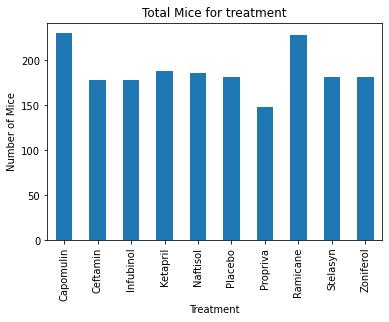

<Figure size 432x288 with 0 Axes>

In [298]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Find out how many of each mice took each treatment
mice_regimen = regimen_df['Mouse ID'].count()



# Chart our data, give it a title, and label the axes
mice_regimen_chart = mice_regimen.plot(kind="bar", title="Total Mice for treatment")
mice_regimen_chart.set_xlabel("Treatment")
mice_regimen_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()

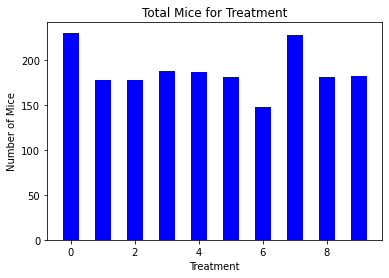

In [324]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_axis = np.arange(len(mice_regimen.index))

plt.bar(x_axis ,mice_regimen, color="b", align="center",
        width = 0.5)

plt.ylabel('Number of Mice') 
plt.xlabel('Treatment') 
plt.title("Total Mice for Treatment")
plt.show()



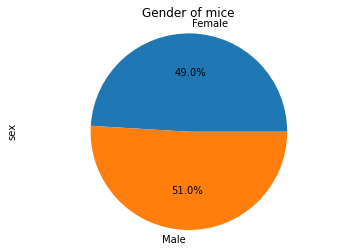

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = mice_study_df.groupby(['Sex'])['Sex'].count()


gender_pie = gender_df.plot(kind="pie", y= 'Sex', title=("Gender of mice"),autopct='%1.1f%%')
gender_pie.set_ylabel("sex")

plt.axis("equal")
plt.show()


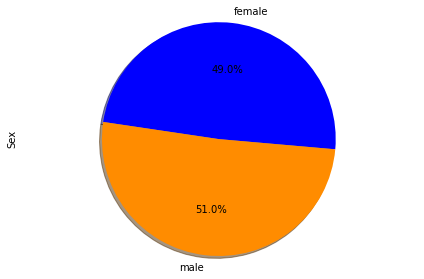

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","darkorange"]


plt.pie(gender_df, labels= ('female', 'male'), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=355)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.ylabel('Sex')
plt.tight_layout()
plt.show()

In [302]:
mice_study_df.columns = [c.replace(' ', '_') for c in mice_study_df.columns]

In [303]:
mice_study_df

Mouse_ID Drug_Regimen   Sex  Age_months  Weight_(g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor_Volume_(mm3)  Metastatic_Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1875           63.145652                 2  
1876           65.841013                 3  
1877           69.176246                 4  
1878           70.314904                 4  
1879           73.867845                 4  

[1880 rows x 8 columns]

## Quartiles, Outliers and Boxplots

In [304]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
four_regimens = mice_study_df[mice_study_df["Drug_Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

four_regimens_max = four_regimens.groupby('Mouse_ID').max()['Timepoint']

#merge the data into the main dataframe
four_regimens_df = pd.merge(mice_study_df, four_regimens_max, on=('Mouse_ID', 'Timepoint'), how='right')

four_regimens_df.head(10)







Mouse_ID Drug_Regimen     Sex  Age_months  Weight_(g)  Timepoint  \
0     a203    Infubinol  Female          20          23         45   
1     a251    Infubinol  Female          21          25         45   
2     a275     Ceftamin  Female          20          28         45   
3     a411     Ramicane    Male           3          22         45   
4     a444     Ramicane  Female          10          25         45   
5     a520     Ramicane    Male          13          21         45   
6     a577    Infubinol  Female           6          25         30   
7     a644     Ramicane  Female           7          17         45   
8     a685    Infubinol    Male           8          30         45   
9     b128    Capomulin  Female           9          22         45   

   Tumor_Volume_(mm3)  Metastatic_Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  
5           38.810366                 1  
6           57.031862                 2  
7           32.978522                 1  
8           66.083066                 3  
9           38.982878                 2

In [326]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cap = []
ram = []
inf = []
cef = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in four_regimens_df.iterrows():
    if row["Drug_Regimen"] == 'Capomulin':
        cap.append(row['Tumor_Volume_(mm3)'])
    if row["Drug_Regimen"] == 'Ramicane':
        ram.append(row['Tumor_Volume_(mm3)'])
    if row["Drug_Regimen"] == 'Infubinol':
        inf.append(row['Tumor_Volume_(mm3)'])
    if row["Drug_Regimen"] == 'Ceftamin':
        cef.append(row['Tumor_Volume_(mm3)'])
    
# add subset 
#created a data frame with the tumor data of the drugs listed.
final_regimen_df = pd.DataFrame({ treatments[0]: cap,
                       treatments[1]: ram,
                       treatments[2]: inf,
                       treatments[3]: cef
                       })
    




final_regimen_df.head(25)
    


Capomulin   Ramicane  Infubinol   Ceftamin
0   38.982878  38.407618  67.973419  62.999356
1   38.939633  43.047543  65.525743  45.000000
2   30.485985  38.810366  57.031862  56.057749
3   37.074024  32.978522  66.083066  55.742829
4   40.159220  38.342008  72.226731  48.722078
5   47.685963  33.397653  36.321346  47.784682
6   37.311846  37.311236  60.969711  61.849023
7   38.125164  40.659006  62.435404  68.923185
8   38.753265  29.128472  60.918767  67.748662
9   41.483008  33.562402  67.289621  57.918381
10  38.846876  36.374510  66.196912  46.784535
11  28.430964  31.560470  62.117279  59.851956
12  33.329098  36.134852  47.010364  64.299830
13  46.539206  22.050126  60.165180  59.741901
14  32.377357  30.564625  55.629428  61.433892
15  41.581521  31.095335  45.699331  64.192341
16  23.343598  45.220869  54.656549  45.000000
17  40.728578  36.561652  55.650681  52.925348
18  34.455298  37.225650  46.250112  45.000000
19  31.023923  43.419381  54.048608  67.527482
20  40.658124  30.276232  51.542431  45.000000
21  39.952347  40.667713  50.005138  64.634949
22  36.041047  43.166373  58.268442  61.386660
23  28.484033  44.183451  67.685569  68.594745
24  31.896238  30.638696  62.754451  64.729837

In [327]:
# Calculate the IQR quantitatively for each Regimen and determine if there are any potential outliers. 

quart_cap = final_regimen_df["Capomulin"].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = final_regimen_df["Capomulin"].max()
min_cap = final_regimen_df["Capomulin"].min()


quart_ram = final_regimen_df["Ramicane"].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = final_regimen_df["Ramicane"].max()
min_ram = final_regimen_df["Ramicane"].min()

quart_inf = final_regimen_df["Infubinol"].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = final_regimen_df["Infubinol"].max()
min_inf = final_regimen_df["Infubinol"].min()

quart_cef = final_regimen_df["Ceftamin"].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = final_regimen_df["Ceftamin"].max()
min_cef = final_regimen_df["Ceftamin"].min()

#Creating data frame
summary_iqr_df = pd.DataFrame({"Regimen":treatments,"Lower Q":[low_cap, low_ram, low_inf, low_cef],
                               "Upper Q":[up_cap, up_ram, up_inf, up_cef],
                               "Median":[med_cap, med_ram, med_inf, med_cef],
                               "Upper Bound":[upb_cap, upb_ram, upb_inf, upb_cef],
                                "Lower Bound":[lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                               "IQR":[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                                "Max": [max_cap, max_ram, max_inf, max_cef],
                                "Min": [min_cap, min_ram, min_inf, min_cef]})

summary_iqr_df



Regimen    Lower Q    Upper Q     Median  Upper Bound  Lower Bound  \
0  Capomulin  32.377357  40.159220  38.125164    51.832015    20.704562   
1   Ramicane  31.560470  40.659006  36.561652    54.306811    17.912664   
2  Infubinol  54.048608  65.525743  60.165180    82.741446    36.832905   
3   Ceftamin  48.722078  64.299830  59.851956    87.666458    25.355450   

         IQR        Max        Min  
0   7.781863  47.685963  23.343598  
1   9.098537  45.220869  22.050126  
2  11.477135  72.226731  36.321346  
3  15.577752  68.923185  45.000000

## Line and Scatter Plots

In [307]:
# quantitatively determine if there are any potential outliers for each Regimen.
print(f"Values below {lowb_cap} could be outliers for Capomulin.")
print(f"Values above {upb_cap} could be outliers for Capomulin.")
print(f"__________________________________________________________")

print(f"Values below {lowb_ram} could be outliers for Ramicane.")
print(f"Values above {upb_ram} could be outliers for Ramicane.")

print(f"__________________________________________________________")
print(f"Values below {lowb_inf} could be outliers for Infubinol.")
print(f"Values above {upb_inf} could be outliers for Infubinol.")

print(f"__________________________________________________________")
print(f"Values below {lowb_cef} could be outliers for Ceftamin.")
print(f"Values above {upb_cef} could be outliers for Ceftamin.")

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
__________________________________________________________
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
__________________________________________________________
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
__________________________________________________________
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


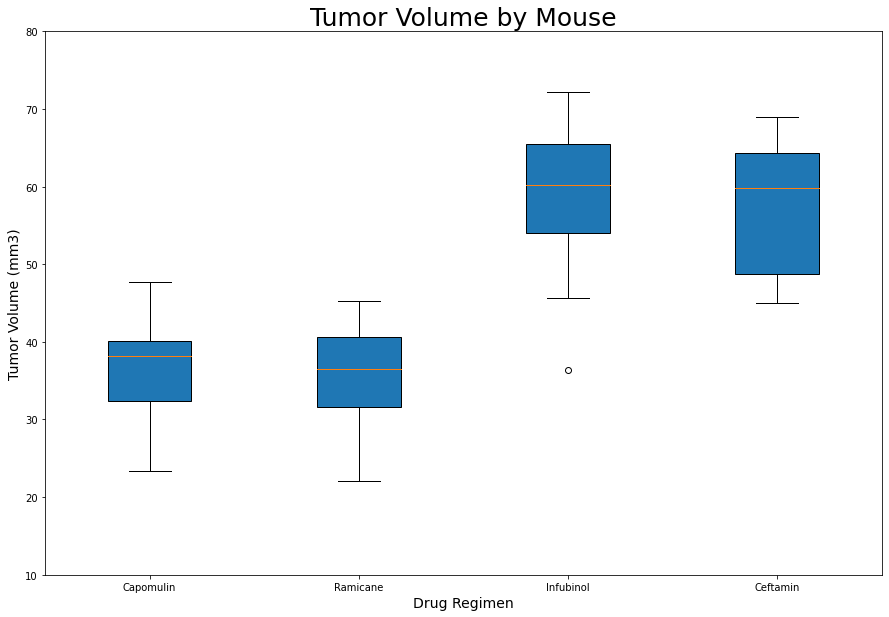

In [308]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_list = [cap, ram, inf, cef]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume by Mouse',fontsize =25)
ax1.set_ylabel('Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(box_list, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.xticks([1,2,3,4], treatments) 
plt.savefig('boxplot')
plt.show()



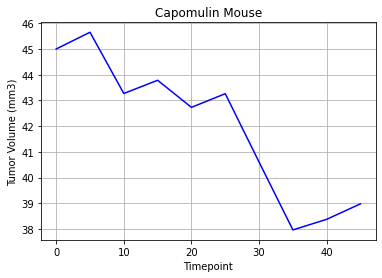

In [321]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create the dataframe
line_chart_df = mice_study_df.loc[mice_study_df["Mouse_ID"] == "b128",:]
line_chart_df

#create the axis 
timepoint = line_chart_df["Timepoint"]
volume = line_chart_df["Tumor_Volume_(mm3)"]


# Plot the charts and apply some styling
cap_mouse = plt.plot(timepoint, volume, color="blue", label="Capomulin mouse")


# Add labels to X and Y axes 
plt.title("Capomulin Mouse")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


# Add in a grid for the chart
plt.grid()

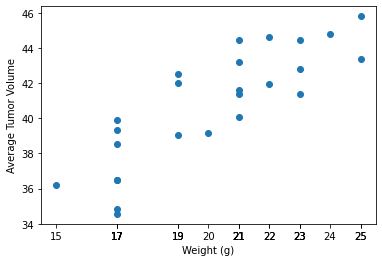

In [310]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

    
cap_df = mice_study_df.loc[mice_study_df["Drug_Regimen"] == "Capomulin",:]
avg_cap =cap_df.groupby(['Mouse_ID']).mean()


weight = avg_cap.iloc[:,1]
volume = avg_cap.iloc[:,3]
plt.scatter(weight, volume)
plt.xticks(weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()






## Correlation and Regression

The correlation coefficient between weight and tumor volume is 0.84
The r-squared is: 0.7088568047708723


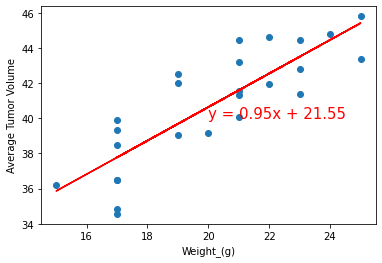

In [319]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")


x_values = avg_cap['Weight_(g)']
y_values = avg_cap['Tumor_Volume_(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight_(g)')
plt.ylabel('Average Tumor Volume')

print(f"The r-squared is: {rvalue**2}")

plt.show()